In [1]:
import matplotlib.pyplot as plt
import glob

In [2]:
%matplotlib inline

In [3]:
cache_glob = glob.glob(
    "/home/xyhang/projects/VCIP2023-grand-challenge/cache/PSNR/*/*/*/b_e.npz"
)
import random
random.shuffle(cache_glob)
cache_glob = cache_glob[:1000]

print(len(cache_glob))

1000


In [4]:
import site
site.addsitedir("/home/xyhang/projects/VCIP2023-grand-challenge/")

from src.math_utils import FitKExp

In [5]:
import tqdm
import numpy as np

R2_results = [[], [], [], [], []]
maxerror_results = [[], [], [], [], []]
msre_results = [[], [], [], [], []]

for filename in tqdm.tqdm(cache_glob):
    curve = FitKExp.load(filename)
    X = curve.X
    Y = curve.Y
    fitters = list([FitKExp(X=X, Y=Y, K=i, retry=False) for i in range(1, 6)])
    for i, fitter in enumerate(fitters):
        R2_results[i].append(fitter.R2(fitter.curve))
        maxerror_results[i].append(fitter.maxerror(fitter.curve))
        msre_results[i].append(fitter.ms_rel_err(fitter.curve))

  0%|          | 2/1000 [00:00<01:58,  8.41it/s]/home/xyhang/anaconda3/envs/SARDCO/lib/python3.9/site-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
100%|██████████| 1000/1000 [02:57<00:00,  5.63it/s]


In [6]:
R2_results = np.asarray(R2_results)
maxerror_results = np.asarray(maxerror_results)
msre_results = np.asarray(msre_results)

In [7]:
maxerror_results[0]

array([1.01177053e+00, 1.88608131e+01, 1.83582480e+00, 3.44933771e+01,
       2.03308876e+01, 5.78978827e+01, 2.29997808e+02, 1.33495324e+01,
       4.05005495e+01, 2.74530426e+01, 5.31724647e+00, 2.56010949e+02,
       1.06475286e+03, 1.80007055e+00, 4.02563748e+01, 1.17023005e+02,
       2.70700942e+02, 4.06104740e+01, 1.20260421e+02, 4.80757679e+00,
       1.17389620e+03, 4.58646034e+00, 4.17388463e+01, 3.03459999e+01,
       5.91262938e+00, 1.40929076e+01, 2.34126014e+03, 1.24253125e+01,
       7.41281023e-01, 3.13445447e+00, 1.45093824e+01, 2.20152058e+02,
       1.89240458e+00, 8.69319794e+00, 5.18446376e+00, 1.55623015e+01,
       1.78403244e+01, 1.65153236e+00, 2.83119990e+01, 1.34201316e+00,
       3.42384828e+00, 9.61677407e+00, 2.59522168e+02, 8.41657784e+01,
       2.54839292e+00, 4.44888546e-01, 4.45179535e+00, 5.89097351e+01,
       8.83652259e+00, 3.46080811e+00, 1.41674777e+01, 6.48607991e+01,
       3.32736073e+01, 1.69446296e+02, 1.01088461e+03, 3.66522867e+01,
      

In [8]:
msre_results[0]

array([5.50267222e-04, 2.68211030e-03, 1.79834609e-04, 1.09124378e-02,
       2.61597790e-03, 2.94729793e-02, 2.61529333e-02, 4.13216290e-03,
       3.11683815e-03, 1.51140106e-01, 3.20363170e-04, 5.25406965e-02,
       1.00018515e-01, 7.01605325e-04, 4.81259743e-03, 1.17518544e-02,
       9.79338841e-03, 1.92824815e-02, 6.20764830e-03, 4.34844344e-04,
       1.04791342e-01, 3.85489810e-03, 1.77664435e-02, 3.22732195e-03,
       1.22489867e-03, 2.49490972e-03, 1.85171016e-01, 2.01470800e-02,
       1.99202750e-04, 2.89560001e-03, 2.28073472e-03, 2.44809690e-02,
       9.41944592e-04, 3.05648441e-03, 8.73360043e-04, 3.13196364e-02,
       1.37281406e-01, 5.79360673e-04, 2.74802766e-03, 1.54933299e-03,
       1.51554482e-03, 7.92931504e-03, 9.56431621e-02, 2.24022824e-02,
       8.15476987e-04, 6.62181670e-04, 3.02247084e-03, 2.87232097e-02,
       1.44381962e-03, 2.10910502e-03, 1.72133594e-02, 1.86433853e-02,
       6.35003240e-02, 2.88372750e-02, 1.60140563e-02, 6.04669951e-02,
      

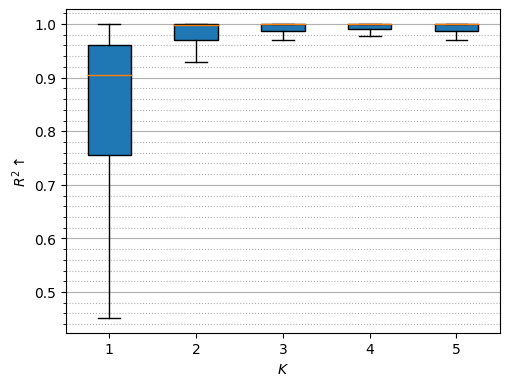

In [9]:
plt.figure(figsize=(5.6, 4.2))

plt.xlabel("$K$")

plt.ylabel(r"$R^2\uparrow$")
plt.tick_params(axis="x", which="minor", bottom=False)

plt.minorticks_on()

plt.boxplot(list(R2_results), patch_artist=True, showfliers=False)
# ax2.violinplot(
#     list(maxerror_results),
# )

plt.xticks([1,2,3,4,5])

plt.grid(which='major', axis='y', linestyle='-')
plt.grid(which='minor', axis='y', linestyle=':')

plt.savefig("./K_Exp_R2.png", dpi=300, bbox_inches="tight")
plt.savefig("./K_Exp_R2.pdf", bbox_inches="tight")

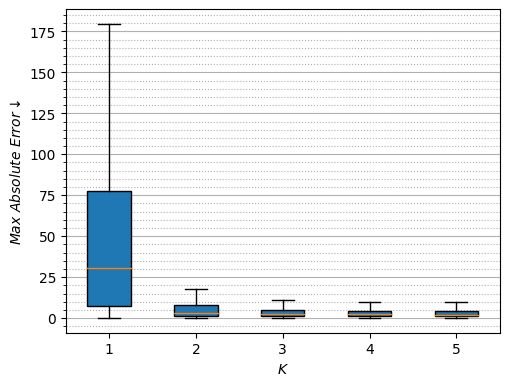

In [10]:
plt.figure(figsize=(5.6, 4.2))

plt.xlabel("$K$")

plt.ylabel(r"$Max~Absolute~Error\downarrow$")
plt.tick_params(axis="x", which="minor", bottom=False)

plt.minorticks_on()

plt.boxplot(list(maxerror_results), patch_artist=True, showfliers=False)
# ax2.violinplot(
#     list(maxerror_results),
# )

plt.xticks([1, 2, 3, 4, 5])

plt.grid(which="major", axis="y", linestyle="-")
plt.grid(which="minor", axis="y", linestyle=":")

plt.savefig("./K_Exp_maxerr.png", dpi=300, bbox_inches="tight")
plt.savefig("./K_Exp_maxerr.pdf", bbox_inches="tight")

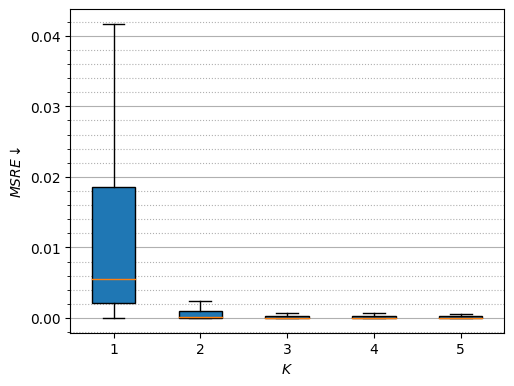

In [11]:
plt.figure(figsize=(5.6, 4.2))

plt.xlabel("$K$")

plt.ylabel(r"$MSRE\downarrow$")
plt.tick_params(axis="x", which="minor", bottom=False)

plt.minorticks_on()

plt.boxplot(list(msre_results), patch_artist=True, showfliers=False)
# ax2.violinplot(
#     list(maxerror_results),
# )

plt.xticks([1, 2, 3, 4, 5])

plt.grid(which="major", axis="y", linestyle="-")
plt.grid(which="minor", axis="y", linestyle=":")

plt.savefig("./K_Exp_msre.png", dpi=300, bbox_inches="tight")
plt.savefig("./K_Exp_msre.pdf", bbox_inches="tight")

2
[0.7611634635126764, 0.9359008383284861, 0.9996314557515584, 0.9996314293737926, 0.9996248296864653] [40.61047398816163, 22.155894792987993, 1.6192200695982137, 1.6194896029632844, 1.617788557263168]


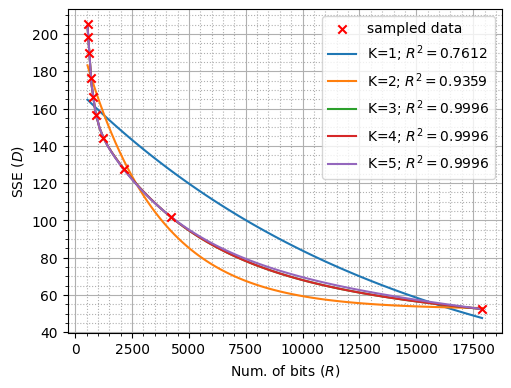

In [18]:
filename = cache_glob[17]
plt.figure(figsize=(5.6, 4.2))
curve = FitKExp.load(filename)
X = curve.X
Y = curve.Y
fitters = list([FitKExp(X=X, Y=Y, K=i, retry=False) for i in range(1, 6)])
R2 = []
Maxerr = []
for i, fitter in enumerate(fitters):
    r2 = fitter.R2(fitter.curve)
    maxerr = fitter.maxerror(fitter.curve)
    if i>1 and r2-R2[-1]>0.01:
        print(i)
    R2.append(r2)
    Maxerr.append(maxerr)
print(R2, Maxerr)
plt.scatter(X, Y, zorder=100, marker='x', color='red', label="sampled data")
rng = np.linspace(X.min(), X.max(), 100)
for i, fitter in enumerate(fitters):
    plt.plot(rng, fitter.curve(rng), label=f"K={i+1}; $R^2={fitter.R2(fitter.curve):.4f}$")
plt.legend()
plt.savefig("K_Exp_sample.png", dpi=300)
plt.minorticks_on()
plt.grid(which='major', axis='both')
plt.grid(which='minor', axis='both', linestyle=':')
plt.xlabel("Num. of bits ($R$)")
plt.ylabel("SSE ($D$)")
plt.savefig("K_Exp_sample.pdf", bbox_inches="tight")
plt.savefig("K_Exp_sample.png", dpi=300, bbox_inches="tight")